In [49]:
import scipy.io 
import numpy as np 
import matplotlib.pyplot as plt 
import copy
from scipy.optimize import minimize

path = '../datasets/ex3data1.mat'
mat = scipy.io.loadmat(path)
X = mat['X'] # 5000 * 400
y = mat['y'] # 5000 * 1
print(X.shape)

(5000, 400)


In [50]:
index = np.where(y==10)[0]
y[index] = 0

In [51]:
ids = np.random.permutation(range(X.shape[0]))
num_train = 4500
X_train = X[ids[:num_train]]
y_train = y[ids[:num_train]]
X_test = X[ids[num_train:]]
y_test = y[ids[num_train:]]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# X_train

(4500, 400)
(4500, 1)
(500, 400)
(500, 1)


In [52]:
# x = (x-x_mean)/(x_max-x_min)
# mean=0
x_mean = np.mean(X_train, axis=0)
def normalize(x):
    x = (x-x_mean) / 255
    return x

    

In [53]:
# add ones
def addones(x):
    ones = np.ones((x.shape[0], 1))
    x_new = np.concatenate((ones, x), axis=1)
    return x_new

/home/phuongnam/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


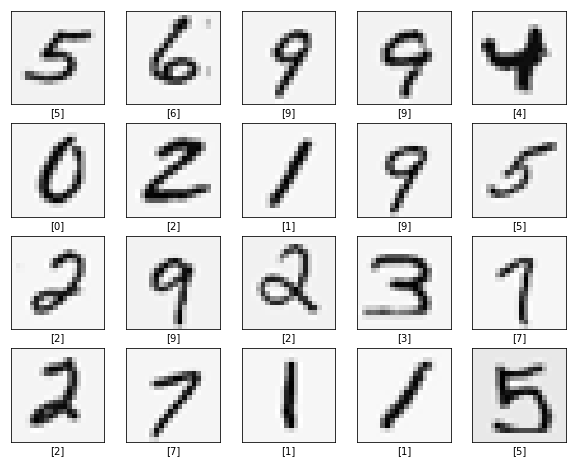

In [54]:
# %matplotlib inline
# Visualize data
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_train[i].reshape(20, 20).T, cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
#     plt.show()
    

In [55]:
# normalize data (only in train data)
X_train = normalize(X_train)
X_train = addones(X_train)
X_train.shape

(4500, 401)

In [56]:
K = 10 #num class

In [57]:
# cac ham thuat toan
def h(theta, x):
    return 1 / (1+np.exp(-np.dot(x, theta)))
def grad(theta, x, y):
    return np.dot(x.T, h(theta, x)-y) / x.shape[0]
def GD(theta_init, x, y, lr, ite):
    theta = theta_init
    for it in range(ite):
        if it%(ite/10) == 0:
            print(cost(theta, x, y))
        theta -= lr*grad(theta, x, y)
    return theta
def cost(theta, x, y):
    cost = np.dot(y.T, np.log(h(theta, x))) + np.dot((1-y).T, np.log(1-h(theta, x)))
    return -np.sum(cost)/x.shape[0]

In [58]:
# khoi tao gia tri
theta_init = np.zeros((X_train.shape[1],1))
lr = 1
ite = 1000000

In [59]:
# normalize test data 
X_test = normalize(X_test)
X_test = addones(X_test)
# print(X_test.mean())

In [60]:
# print(y_pred)
# print((np.max(y_pred, axis=1)))

In [61]:
y_pred_train = np.zeros((y_train.shape[0], 1))
y_pred = np.zeros((y_test.shape[0], 1))
for k in range(K):
#     X_train_, y_train_, X_test_, y_test_ = X_train, y_train, X_test, y_test
#     print('############################')
#     print(k)
    X_train_ = copy.deepcopy(X_train)
    y_train_ = copy.deepcopy(y_train)
    X_test_ = copy.deepcopy(X_test)
    y_test_ = copy.deepcopy(y_test)
    
    ind = np.where(y_train_ == k)[0]
    print(len(ind)) #positve example
    y_train_[ind] = 1
    for i in range(y_train_.shape[0]):
        if i not in ind:
            y_train_[i] = 0
#     print(X_train_)
#     print(y_train_)
#     print(y_train_[6])

#     print(theta_init)
#     print(lr)
#     print(ite)

#     theta_op = GD(theta_init, X_train_, y_train_, lr, ite)
    
#     ind_ = np.where(y_test_ == k)[0]
#     y_test_[ind_] = 1
#     for i in range(y_test_.shape[0]):
#         if i not in ind_:
#             y_test_[i] = 0
#     print(theta_op.mean())        
#     pred = h(theta_op, X_train_)
#     print(pred)
#     pred = (np.sign(h(theta_op, X_test_) - 0.5) + 1) / 2
#     print(pred)
#     print(len(np.where((np.sign(pred - 0.5)+ 1) / 2 == 1)[0]))
#     y_pred = np.hstack((y_pred, pred))
#     if k==2:
#         break
#     pred = (np.sign(h(theta_op, X_test) - 0.5)+ 1) / 2
    theta_op = minimize(cost, x0=theta_init, args=(X_train_, y_train_)).x
    pred = h(theta_op, X_test_)
    pred = pred.reshape(y_test_.shape)
    pred_train = h(theta_op, X_train_)
    pred_train = pred_train.reshape(y_train_.shape)
#     print(y_pred.shape)
#     print(pred.shape)
    y_pred = np.concatenate((y_pred, pred), axis=1)
    y_pred_train = np.concatenate((y_pred_train, pred_train), axis=1)

454
451
448
445
455
454
429
455
452
457


In [62]:
# print(np.argmax(y_pred, axis=1)-1)
# print(y_test.ravel())
predict_train = np.argmax(y_pred_train, axis=1) - 1
print(np.mean(predict_train == y_train.ravel()))

predict = np.argmax(y_pred, axis=1) - 1
print(np.mean(predict == y_test.ravel()))

0.9091111111111111
0.934


In [63]:
# y = y.ravel()
# predict = np.argmax(y_pred, axis=1) - 1
# print(y)
# print(predict)
# # print(np.mean(predict == y))

In [64]:
# ind = np.where(y_train == 0)[0]
# # x_train = X_train[ind, :][0]
# # x_train.shape
# print(len(ind))
# y_train[ind] = 1
# for i in range(y_train.shape[0]):
#     if i not in ind:
#         y_train[i] = 0
    
# # [y_train[i] = 0 for i in range((y_train.shape[0])) if i not in ind]
# print(y_train.shape)

In [65]:
# ind = np.where(y_test == 0)[0]
# # x_train = X_train[ind, :][0]
# # x_train.shape
# # print(ind)
# y_test[ind] = 1
# for i in range(y_test.shape[0]):
#     if i not in ind:
#         y_test[i] = 0
# print(y_test.shape)    

In [66]:
# minimum = minimize(cost, x0=theta_init, args=(X_train, y_train), method='TNC')
# print(minimum)

In [67]:
# print(minimum.x.shape)

In [68]:
# theta_op = GD(theta_init, X_train, y_train, lr, ite)
# pred = (np.sign(h(theta_op, X_test) - 0.5)+ 1) / 2
# print(len(np.where(pred == 1)[0]))
# print(np.mean(pred == y_test))

In [69]:
# result = minimize(cost, x0=theta_init, args=(X_train, y_train))
# print(result.x.shape)

In [70]:
# # print(result.x.shape)
# pred = (np.sign(h(result.x, X_train) - 0.5)+ 1) / 2
# print(len(np.where(pred == 1)[0]))

In [71]:
# print(y_pred.shape)
# predict = 
# print(y_test.shape)

In [72]:
# print(np.max(h(theta_op, X_test), axis=1))